In [16]:
import os
import importlib

%cd /mnt/home/acanatar/jupyter/SNAP

data_root = './data/'
processed_data_root = os.path.join(data_root, 'processed/')
figures_root = os.path.join(data_root, 'figures/')

os.makedirs(processed_data_root, exist_ok=True)
os.makedirs(figures_root, exist_ok=True)

device = 'cuda'

/mnt/home/acanatar/jupyter/SNAP


In [17]:
import importlib
from itertools import product
from scipy import stats
import scipy as sp
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


import dimensionality

importlib.reload(dimensionality)
importlib.reload(dimensionality.utils)
importlib.reload(dimensionality.data_utils)
importlib.reload(dimensionality.regression_utils)

from dimensionality.data_utils import (DataProcess, eff_dimension, mode_threshold, create_dataframe)
import dimensionality.regression_utils as reg_utils


### Visualize Data Dictionary Structure

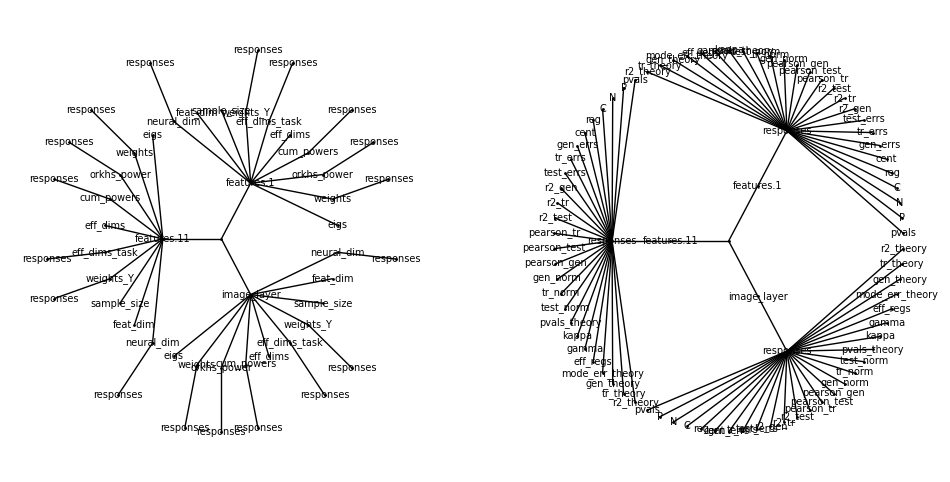

In [18]:
import dimensionality.utils as utils
data_fname = data_root + f"data_None_RandProj_None" + f"/V1_data_alexnet_pretrained.npz"
model_dict = np.load(data_fname, allow_pickle=True)['exp_metrics'].tolist()
layers = model_dict.pop('layers')

spec_dict = model_dict['spectrum']['cent']
metric_dict = model_dict['regression_metric']['cent']

spec_dict.pop('response_layer')
metric_dict.pop('response_layer')
# spec_dict.pop('image_layer')
# metric_dict.pop('image_layer')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
utils.visualize_dict_layer(spec_dict, layer_root=layers[0].split('.')[0], layer_name=layers[0], ax=ax1)
utils.visualize_dict_layer(metric_dict, layer_root=layers[0].split('.')[0], layer_name=layers[0], ax=ax2)
plt.show()

## Gather Data

In [19]:
dataset = 'dicarlo'
image_type = 'original'  # Only matters for Cadena dataset

regionNames = ['V1',
               'V2',
               'V4',
               'IT'
               ]

activation_pooling = ["None",
                      #   'MaxPool_(1,1)',
                      #   'AvgPool_(1,1)',
                      ]

rand_projections = [
    #  "8000",
    # "12000",
    "None"
]
pretrained = {True: 'pretrained',
              False: 'untrained'
              }


modelNames = ['alexnet',
              ]



pooling_list = []
for item in product(activation_pooling, rand_projections):
    pooling_list += ["_RandProj_".join(item)]
activation_pooling = pooling_list.copy()


Data = DataProcess(data_root, activation_pooling, regionNames, modelNames, pretrained)
dfs_all = Data.get_dataframe(load=False, save_all_data_pckl=True)


Generating dataframe
Done!


## Process Data

In [20]:
trained = True
sort_coord = 'final_scores'
threshold = 0.99

region_list = Data.region_list
pooling_list = Data.pooling_list
model_list = Data.model_list

for region in region_list:
    for pooling in pooling_list:
        print(region, pooling)
        processed_data_name = processed_data_root + f'{region}_{pooling}_{pretrained[trained]}.npz'

        all_data_kwargs = dict(sort_coord=sort_coord,
                               trained=trained,
                               region_list=[region],
                               pooling_list=[pooling],
                               model_list=model_list,
                               eff_dim_cutoff=0,
                               threshold=threshold,
                               )
        all_reg_hist, all_processed_data = Data.get_all_data(**all_data_kwargs)
        all_reg_hist = all_reg_hist[region][pooling]
        all_processed_data = all_processed_data[region][pooling]
        
        np.savez(processed_data_name, all_reg_hist=all_reg_hist, all_processed_data=all_processed_data, all_data_kwargs=all_data_kwargs)


V1 None_RandProj_None
V2 None_RandProj_None
V4 None_RandProj_None
IT None_RandProj_None


In [21]:
trained = False
sort_coord = 'final_scores'
threshold = 0.99

region_list = Data.region_list
pooling_list = Data.pooling_list
model_list = Data.model_list

for region in region_list:
    for pooling in pooling_list:
        print(region, pooling)
        processed_data_name = processed_data_root + f'{region}_{pooling}_{pretrained[trained]}.npz'

        all_data_kwargs = dict(sort_coord=sort_coord,
                               trained=trained,
                               region_list=[region],
                               pooling_list=[pooling],
                               model_list=model_list,
                               eff_dim_cutoff=0,
                               threshold=threshold,
                               )
        try:
            all_reg_hist, all_processed_data = Data.get_all_data(**all_data_kwargs)
            all_reg_hist = all_reg_hist[region][pooling]
            all_processed_data = all_processed_data[region][pooling]
        except Exception as e:
            print(e)
            

        
        np.savez(processed_data_name, all_reg_hist=all_reg_hist, all_processed_data=all_processed_data, all_data_kwargs=all_data_kwargs)

V1 None_RandProj_None
V2 None_RandProj_None
V4 None_RandProj_None
IT None_RandProj_None
